In [21]:
scipy.io.savemat('data/1/data.mat',dict([('ks_data_origin',ks_data_origin),
                ('b.output_w',b.output_w),('rmse',rmse),('rmse_vec',rmse_vec),
                ('rmse_vert',rmse_vert),('pred_output',pred_output),('xx_',xx_),
                ('tt',tt)]))

In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import scipy.io

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data1D
import data_utils

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir


%matplotlib inline
import matplotlib.pyplot as plt

# setx PATH "%PATH%;C:\Octave\Octave-5.1.0.0

In [2]:
# Input data
n_sequence=1
spatial_points = 65
lyap_exp = 0.0461
n_train = 4000
n_test = 2000
forget = 100
parallel_runs = 1
ks_data_origin, xx_, tt = data1D.kuramoto_sivashinsky_from_dataset(sequence_length=n_train+n_test, n_sequence=n_sequence)
# ks_data_origin=ks_data_origin+np.random.rand(ks_data_origin.shape[0],ks_data_origin.shape[1],ks_data_origin.shape[2])
ks_data_train = ks_data_origin[:, :n_train, :]
input_shape=ks_data_train.shape

In [3]:
b = Reservoir(n_res=2000, res_scale=0.21, res_encoding='phase',
              input_enc_param=np.pi, res_enc_param=np.pi,
              input_scale=0.21, input_encoding='phase',
#               scale_input_MinMax = (-np.pi, np.pi), scale_res_MinMax = (0, 0.1), scale_output_MinMax = (-np.pi, np.pi), # data standardization
              raw_input_feature = True, enc_input_feature = False, # concatenated states properties
              random_projection='simulation', weights_type='complex gaussian',
              activation_fun='intensity_in_tanh', activation_param=np.pi/2,
              parallel_runs=parallel_runs, bias_scale=0, leak_rate=0,
              pred_horizon=1, rec_pred_steps=460, forget = forget,
              train_method='ridge', train_param=30, verbose=1
             )

# Algorithm training
b.fit(ks_data_train);

Reservoir Computing algorithm - Training phase:

Initialization complete. 		Elapsed time: 0.41334009170532227 s
3.080482120555839 -3.0540491841505184 6.134531304706357


3.685299426697996 -3.246051769953679 6.931351196651676
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0000000000000004 0.004945246313269536 0.9950547536867309
1.0 0.004945246313269536 0.9950547536867305
0.9999999999999996 0.004945246313269536 0.99505475368673
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

Reservoir iterations complete. 		Elapsed time: 27.34997797012329 s
Training complete. 			Elapsed time: 0.628411054611206 s
Training score: 0.9989186691628805


In [117]:
(np.tanh(data_utils.scale(b.state.T, (-3, 0))))[:,:].shape

(2000, 200)

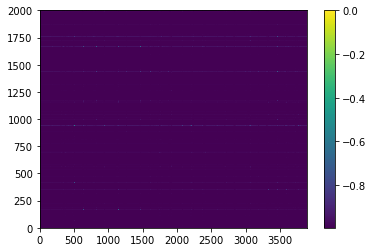

In [4]:
im = plt.pcolormesh(np.tanh(data_utils.scale(b.state.T, (-3, 0))))
plt.colorbar(im)

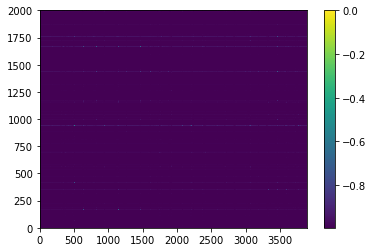

In [5]:
im = plt.pcolormesh(np.tanh(data_utils.scale(b.state.T, (-3, 0))))
plt.colorbar(im)

0.5 -0.49505475368673046 0.9950547536867305


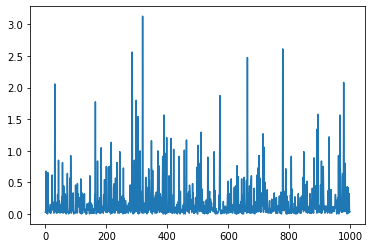

In [13]:
plt.plot(np.angle(b.encode(b.state, target = "res")).T)

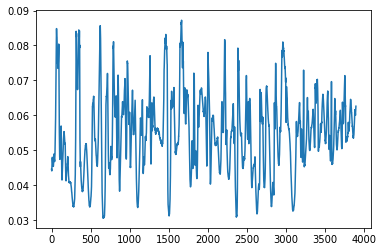

In [9]:
plt.plot(np.std(b.c[0, :, :-65].T, axis=0))

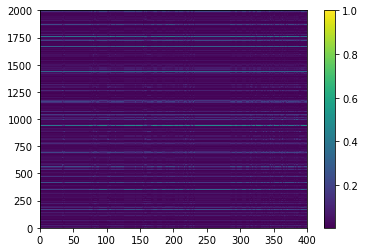

In [14]:
im = plt.pcolormesh(b.state.T)
plt.colorbar(im)

0.9950548


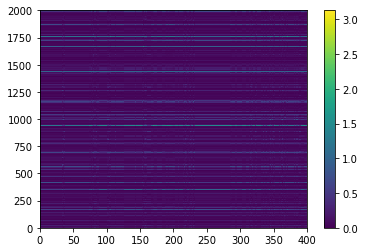

In [17]:
im = plt.pcolormesh(np.angle(b.encode(b.state.T, target='res')))
plt.colorbar(im)

In [14]:
plt.plot(b.state[2,:].T)

IndexError: index 2 is out of bounds for axis 0 with size 1

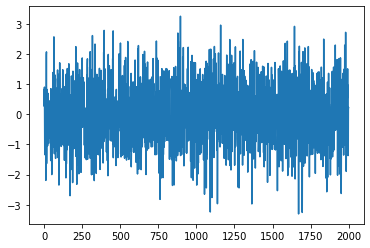

In [9]:
b.reset_state()
plt.plot(b.state[0,:].T)

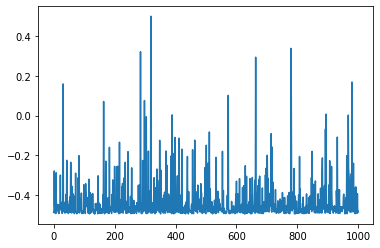

In [15]:
plt.plot(b.state.T)

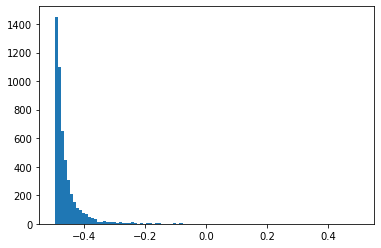

In [8]:
plt.hist(b.xx.T, bins=100);

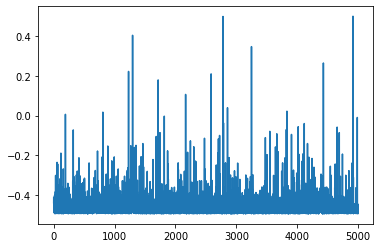

In [7]:
plt.plot(b.xx.T)

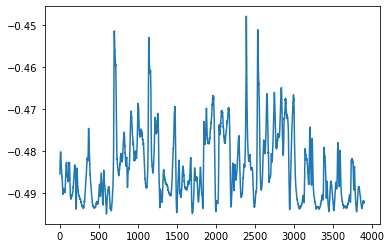

In [6]:
plt.plot(b.c[0, :, 1000])

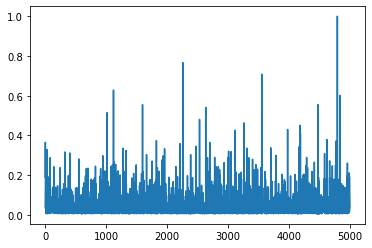

In [8]:
plt.plot(b.c[0, 80, :-65])

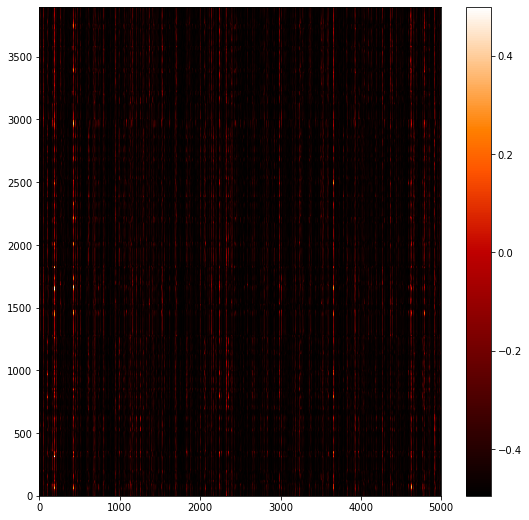

In [5]:
plt.figure(1,figsize=(9,9))
im=plt.pcolormesh(b.c[0, :, :-65], cmap='gist_heat')
plt.colorbar(im)

In [4]:
# testing data
ks_data_test = ks_data_origin[:, n_train:, :]

# Algorithm testing
parallel=200
b.forget = n_test - b.pred_horizon*b.rec_pred_steps - parallel
pred_output, rmse, rmse_vec, rmse_vert = b.predict_and_score(ks_data_test, detailed_score=True)
print(rmse_vec[:5])

Reservoir Computing algorithm - Testing phase:

Initialization complete. 		Elapsed time: 0.0030214786529541016 s


3.0650126657461816 -3.0187757591442677 6.083788424890449


3.443573546124807 -3.611559936675518 7.055133482800325
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.99505

1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
1.0 0.004945246313269536 0.9950547536867305
3.0427567096037307 -2.9034190519356224 5.946175761539353
1.0 0.0049452465 0.9950548
3.019966836196163 -2.9053284173513703 5.925295253547533
1.0 0.0049452465 0.9950548
3.0068885189528536 -2.921312280718089 5.928200799670943
1.0 0.0049452465 0.9950548
3.0041243493733893 -2.933567583106661 5.937691932480051
1.0 0.0049452465 0.9950548
3.0094920562677316 -2.9564247285909766 5.965916784858708
1.0 0.0049452465 0.9950548
3.017770414

2.230895067933378 -2.6001765210046277 4.831071588938006
1.0 0.0049452465 0.9950548
2.2236477921598543 -2.599862200027701 4.823509992187555
1.0 0.0049452465 0.9950548
2.2618439104339503 -2.6005445349743894 4.86238844540834
1.0 0.0049452465 0.9950548
2.3026801755503454 -2.6004739111475086 4.903154086697854
1.0 0.0049452465 0.9950548
2.346314355103802 -2.599267533693771 4.945581888797573
1.0 0.0049452465 0.9950548
2.3882942951595467 -2.5948527462578106 4.983147041417357
1.0 0.0049452465 0.9950548
2.4301018329225132 -2.5886957773880623 5.018797610310576
1.0 0.0049452465 0.9950548
2.4687240219230597 -2.5881650909565836 5.056889112879643
1.0 0.0049452465 0.9950548
2.5034940249732416 -2.6046776828035862 5.108171707776828
1.0 0.0049452465 0.9950548
2.5358439467105995 -2.6197528097107963 5.155596756421396
1.0 0.0049452465 0.9950548
2.5661776916235133 -2.6352119664216085 5.201389658045121
1.0 0.0049452465 0.9950548
2.5946604764348407 -2.651496991952254 5.246157468387095
1.0 0.0049452465 0.995054

3.0566502268122595 -3.881682475420179 6.938332702232438
1.0 0.0049452465 0.9950548
3.0593450308512002 -3.8831954963080952 6.942540527159295
1.0 0.0049452465 0.9950548
3.061880201247512 -3.88444898799037 6.946329189237882
1.0 0.0049452465 0.9950548
3.063458388900178 -3.8847920431226695 6.9482504320228475
1.0 0.0049452465 0.9950548
3.064943167828626 -3.884363672041206 6.949306839869832
1.0 0.0049452465 0.9950548
3.065971455218162 -3.8824565255686903 6.948427980786852
1.0 0.0049452465 0.9950548
3.0666922281234408 -3.8804418654509885 6.947134093574429
1.0 0.0049452465 0.9950548
3.067273255324037 -3.878132993969643 6.94540624929368
1.0 0.0049452465 0.9950548
3.067586936948949 -3.875704759922191 6.943291696871141
1.0 0.0049452465 0.9950548
3.068118445852404 -3.8733007983230427 6.941419244175447
1.0 0.0049452465 0.9950548
3.0678010104533238 -3.8697113287198786 6.937512339173202
1.0 0.0049452465 0.9950548
3.0671877289569007 -3.865596936935648 6.932784665892549
1.0 0.0049452465 0.9950548
3.0664

3.5078884200299325 -3.4142945900943844 6.922183010124317
1.0 0.0049452465 0.9950548
3.5165933331468704 -3.4283374631921246 6.944930796338995
1.0 0.0049452465 0.9950548
3.5241794210960364 -3.44199742874276 6.966176849838797
1.0 0.0049452465 0.9950548
3.529810519525384 -3.4545314175569484 6.984341937082332
1.0 0.0049452465 0.9950548
3.534826793574763 -3.4660907211944094 7.0009175147691725
1.0 0.0049452465 0.9950548
3.5387019160068354 -3.476466695138995 7.01516861114583
1.0 0.0049452465 0.9950548
3.5404026466133214 -3.4848223703545504 7.025225016967871
1.0 0.0049452465 0.9950548
3.5418628215443433 -3.497037575176314 7.038900396720657
1.0 0.0049452465 0.9950548
3.542247074133618 -3.508714011303715 7.050961085437333
1.0 0.0049452465 0.9950548
3.542131023371305 -3.521503160056516 7.063634183427821
1.0 0.0049452465 0.9950548
3.5410442140161633 -3.533758532982845 7.0748027469990085
1.0 0.0049452465 0.9950548
3.5385800598729267 -3.5463034318742417 7.084883491747169
1.0 0.0049452465 0.9950548
3.

3.504584944388832 -4.035980124366586 7.540565068755418
1.0 0.0049452465 0.9950548
3.505346212542688 -4.035079369980347 7.540425582523035
1.0 0.0049452465 0.9950548
3.506284560701857 -4.03465119635287 7.5409357570547275
1.0 0.0049452465 0.9950548
3.5068755528924673 -4.034137393260101 7.541012946152568
1.0 0.0049452465 0.9950548
3.507322100231003 -4.034068384861449 7.541390485092451
1.0 0.0049452465 0.9950548
3.5077682049678915 -4.035239141467939 7.5430073464358305
1.0 0.0049452465 0.9950548
3.50675406490697 -4.035372323766516 7.542126388673486
1.0 0.0049452465 0.9950548
3.5021403744177593 -4.028313856753486 7.530454231171245
1.0 0.0049452465 0.9950548
3.4968735478855932 -4.023718398260083 7.520591946145677
1.0 0.0049452465 0.9950548
3.499989505234682 -4.021343027734756 7.521332532969438
1.0 0.0049452465 0.9950548
3.503830076772866 -4.017306865276807 7.521136942049673
1.0 0.0049452465 0.9950548
3.5029494203466798 -4.011243632591257 7.514193052937937
1.0 0.0049452465 0.9950548
3.501278062

best plot is at 143


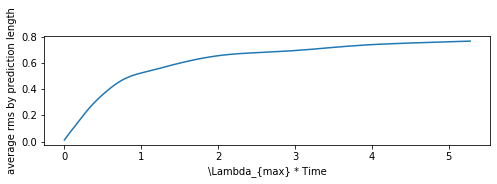

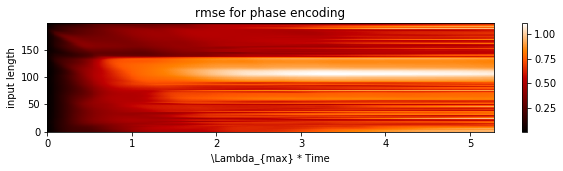

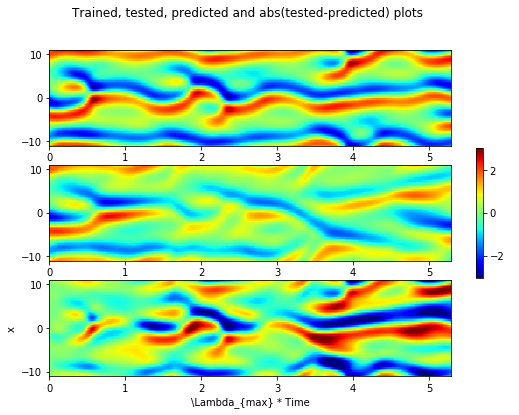

In [5]:
total_pred = (rmse.shape[1])
length_input = pred_output.shape[0] - total_pred
time_input = range(rmse.shape[0])
time_pred = tt[0:total_pred]*lyap_exp

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by prediction length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(time_pred[:], rmse_vec[:])
# scipy.io.savemat('time_pred_new_2.mat', dict(time_pred_new_2=time_pred))
# scipy.io.savemat('rmse_vec_new_2.mat', dict(rmse_vec_new_2=rmse_vec))
plt.show;
# plt.savefig('phase_LM_kuramoto_rmse.png', dpi=400)

plt.figure(2,figsize=(10,2))
plt.title('rmse for phase encoding')
plt.ylabel('input length')
plt.xlabel('\Lambda_{max} * Time')
im=plt.pcolormesh(time_pred[:], time_input[:], rmse[:,:], cmap='gist_heat')
plt.colorbar(im)
plt.show;

xx = xx_
n_input = np.argmin(np.sum(rmse[:,:200],axis=1)) # np.argmin(rmse_vert)
# i=0
# time = (tt[0:n_input] if i==0 else tt[0:total_pred])*lyap_exp
total_pred = b.pred_horizon*b.rec_pred_steps

# input_data = data_utils.scale(ks_data_test[0, b.forget:b.forget+total_pred, :], (-np.pi, np.pi))
# targetted_data = data_utils.scale(ks_data_test[0, n_input+b.forget:n_input+b.forget+total_pred, :], (-np.pi, np.pi))

input_data = ks_data_test[0, b.forget:b.forget+total_pred, :]
targetted_data = ks_data_test[0, n_input+b.forget:n_input+b.forget+total_pred, :]

prediction = pred_output[n_input, :].reshape(targetted_data.shape)

vmax = max(abs(np.concatenate((targetted_data, input_data)).flatten()))
vmin = -vmax

# plot training data
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(9,6))
plt.suptitle('Trained, tested, predicted and abs(tested-predicted) plots                       ')
plt.ylabel('x')
plt.xlabel('\Lambda_{max} * Time')
# print(targetted_data.shape)
# print(prediction.shape)
# datum = [input_data, targetted_data, prediction, np.abs(targetted_data-prediction)]
datum = [targetted_data, prediction, targetted_data-prediction]
# print(datum[0].shape)
# time = (tt[0:n_input+b.forget] if i==0 else tt[0:total_pred])*lyap_exp
# xx_axs, time_axs = np.mgrid[xx, time]
xx_axs = np.zeros((spatial_points, total_pred))
time_axs = np.zeros((spatial_points, total_pred))
for i in range(total_pred):
    xx_axs[:, i] = xx
for i in range(spatial_points):
    time_axs[i, :] = (tt[n_input+b.forget:n_input+b.forget+total_pred]-tt[n_input+b.forget])*lyap_exp
for i in range(3):
    # im=axs[i].pcolormesh(time, xx, datum[i].T, cmap='viridis', vmin=vmin, vmax=vmax)
    im=axs[i].pcolormesh(time_axs, xx_axs, datum[i].T, cmap=plt.get_cmap('jet'), vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
# plt.savefig('phase_SLM_kuramoto_pred.png', dpi=400)

# plt.figure(3,figsize=(9,2.5))
# im=plt.pcolormesh(time_axs, xx_axs, datum[2].T, cmap='gray')
# plt.colorbar(im)
# plt.savefig('DND_input_data.png')

print('best plot is at '+str(np.argmin(rmse_vert)))

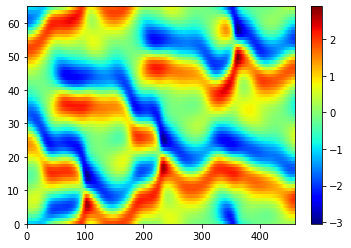

In [16]:
im=plt.pcolormesh(datum[0].T, cmap=plt.get_cmap('jet'))
plt.colorbar(im)

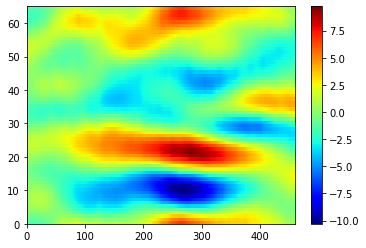

In [14]:
im=plt.pcolormesh(datum[1].T, cmap=plt.get_cmap('jet'))
plt.colorbar(im)

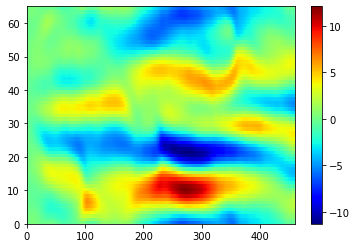

In [15]:
im=plt.pcolormesh(datum[2].T, cmap=plt.get_cmap('jet'))
plt.colorbar(im)

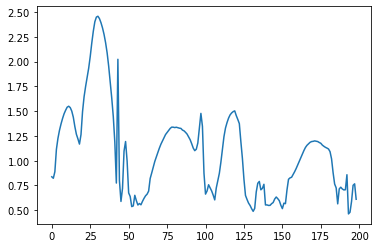

In [208]:
plt.plot(rmse_vert[:])